*Encode Block*


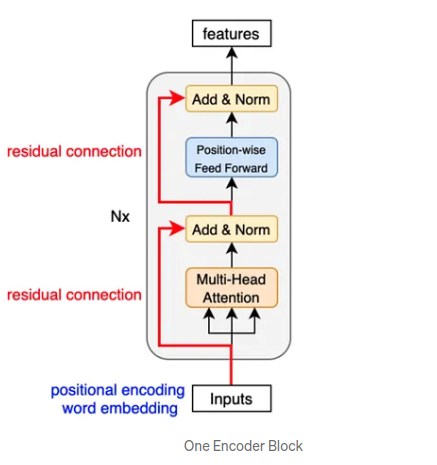

In [4]:
import torch.nn as nn

class EncoderBlock(nn.Module):
    def __init__(self, latent_size, num_heads,  dropout):
        super(EncoderBlock, self).__init__()

        self.latent_size = latent_size
        self.num_heads = num_heads
        self.dropout = dropout

        self.norm1 = nn.LayerNorm(self.latent_size)
        self.norm2 = nn.LayerNorm(self.latent_size)

        self.multihead = nn.MultiheadAttention(
            self.latent_size, self.num_heads, dropout=self.dropout)

        self.feedforwardnet = nn.Sequential(
            nn.Linear(self.latent_size, self.latent_size * 4),
            nn.ReLU(),
            nn.Dropout(self.dropout),
            nn.Linear(self.latent_size * 4, self.latent_size),
            nn.Dropout(self.dropout)
        )

    def forward(self, embedded_patches):

        attention_output = self.multihead(embedded_patches, embedded_patches, embedded_patches)[0]
        first_added_output = attention_output + embedded_patches

        secondNorm_out = self.norm2(first_added_output)
        ff_output = self.feedforwardnet(secondNorm_out)

        return ff_output + first_added_output


In [5]:
import torch
encoder_block = EncoderBlock(latent_size=512, num_heads=16, dropout=0.1)

#Dummy input data
embedded_patches = torch.randn(16, 100, 512)

output = encoder_block(embedded_patches)
#Output embedding shape should be same as the sape of input tensor
print("Input Shape: ",embedded_patches.shape)
print("Encoder-Output Shape:",output.shape)


Input Shape:  torch.Size([16, 100, 512])
Encoder-Output Shape: torch.Size([16, 100, 512])
